In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

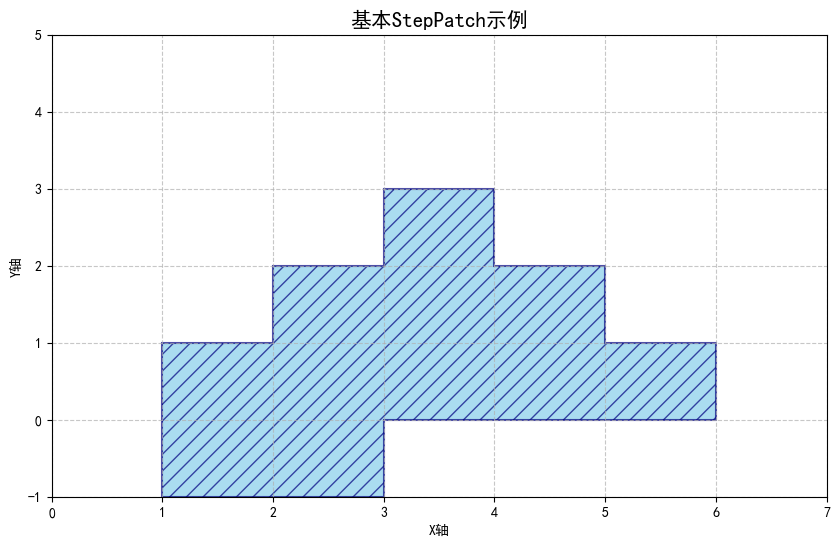

In [3]:
from matplotlib.patches import StepPatch

# 创建示例数据
values = [1, 2, 3, 2, 1]
edges = range(1, 7)

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(10, 6))

# 创建StepPatch对象并添加到坐标轴
patch = StepPatch(
    values=values,               # 阶梯的高度值列表
    edges=edges,                 # 阶梯的边界点坐标
    orientation='vertical',      # 阶梯方向
    baseline=np.array([-1, -1, 0, 0, 0]),  # 基线值，决定每个阶梯的起始高度
    facecolor='skyblue',         # 图形内部填充颜色
    edgecolor='navy',            # 图形边缘线条颜色
    linewidth=1.5,               # 边缘线条宽度
    linestyle='-',               # 边缘线条样式
    hatch='//',                  # 填充图案
    alpha=0.7                    # 透明度
                 )
ax.add_patch(patch)

# 设置坐标轴范围
ax.set_xlim(0, 7)
ax.set_ylim(-1, 5)
ax.set_title('基本StepPatch示例', fontsize=15)
ax.set_xlabel('X轴')
ax.set_ylabel('Y轴')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 2、使用示例：

### 示例 1：系统资源监控

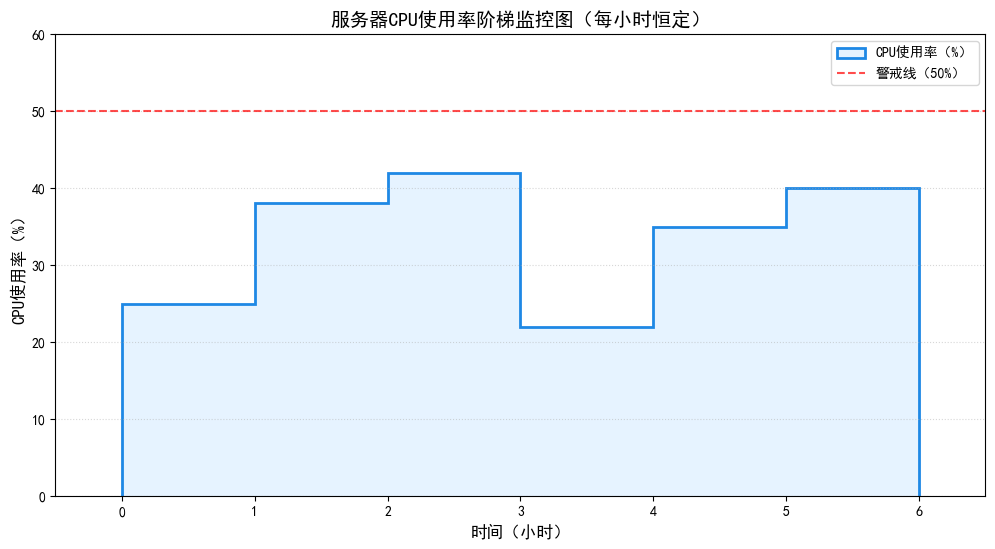

In [4]:
import matplotlib.patches as mpatches

# 数据定义：
# hours：表示时间边界点（整点），共7个时间点，形成6个1小时的区间
hours = np.array([0, 1, 2, 3, 4, 5, 6])
# 每个时间区间内的CPU使用率数值，与hours形成的区间一一对应
cpu_usage = np.array([25, 38, 42, 22, 35, 40]) 
# baseline
baseline = 0  

fig, ax = plt.subplots(figsize=(12, 6))

# 创建StepPatch
step_patch = mpatches.StepPatch(
    values=cpu_usage,               # 每个区间的数值
    edges=hours,                    # 区间的边界点
    orientation="vertical",         # 阶梯方向
    baseline=baseline,              # 基线值
    facecolor="#E6F3FF",            # 图形内部填充色
    edgecolor="#1E88E5",            # 图形边缘线条颜色
    linewidth=2,                    # 边缘线条宽度
    label="CPU使用率（%）"           # 图例标签
)
# 将创建的阶梯图添加到坐标轴上
ax.add_patch(step_patch)

ax.set_xlim(hours.min()-0.5, hours.max()+0.5)
ax.set_ylim(0, 60)
ax.set_xlabel("时间（小时）", fontsize=12)
ax.set_ylabel("CPU使用率（%）", fontsize=12)
ax.set_title("服务器CPU使用率阶梯监控图（每小时恒定）", fontsize=14, fontweight="bold")

# 添加水平警戒线（CPU使用率50%为阈值）
ax.axhline(y=50, color="red", linestyle="--", alpha=0.7, label="警戒线（50%）")

ax.grid(axis="y", linestyle=":", alpha=0.5)
ax.legend()
plt.show()

### 示例 2：绘制堆叠阶梯图

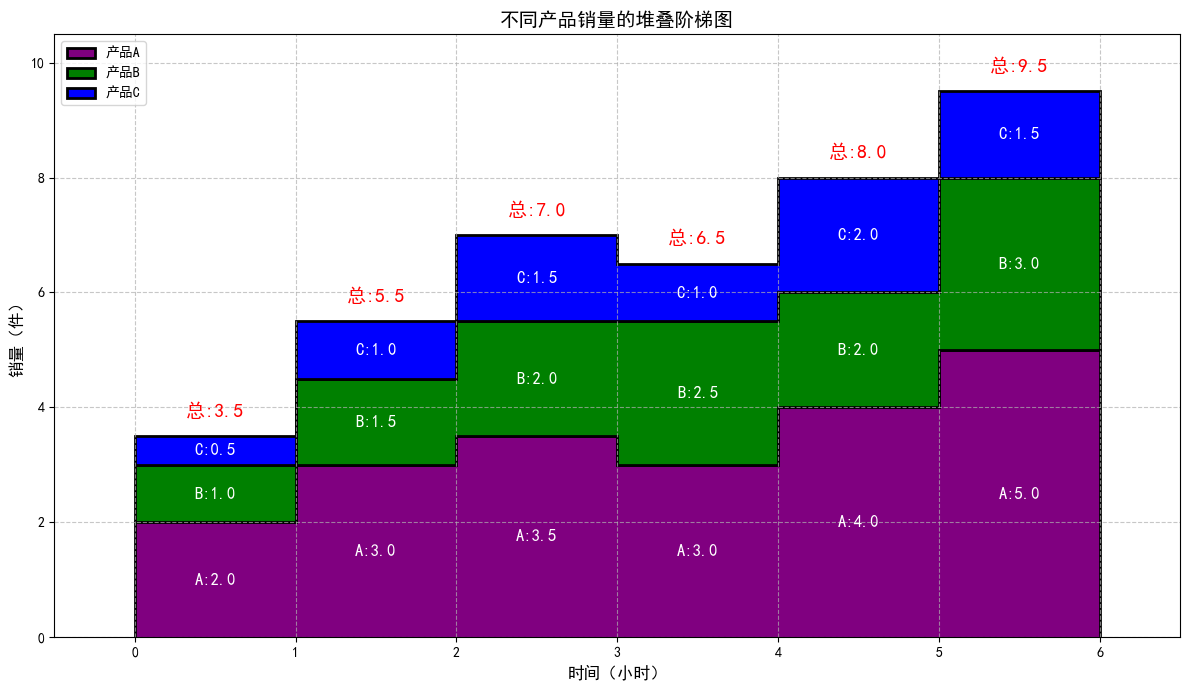

In [5]:
import matplotlib.patches as mpatches

# 准备数据
# 时间区间边界（edges）
time_edges = np.array([0, 1, 2, 3, 4, 5, 6])  # 7个点形成6个区间

# 三组数据的阶梯值（values）
data1 = np.array([2, 3, 3.5, 3, 4, 5])  # 第一组数据
data2 = np.array([1, 1.5, 2, 2.5, 2, 3])  # 第二组数据
data3 = np.array([0.5, 1, 1.5, 1, 2, 1.5])  # 第三组数据

# 计算堆叠的基线（每一组的基线是前几组的总和）
baseline1 = np.zeros_like(data1)
baseline2 = data1
baseline3 = data1 + data2

fig, ax = plt.subplots(figsize=(12, 7))

# 定义颜色和标签
colors = ['purple', 'green', 'blue']
labels = ['产品A', '产品B', '产品C']

# 创建并添加StepPatch
patch1 = mpatches.StepPatch(
    values=data1,
    edges=time_edges,
    baseline=0,
    orientation='vertical',
    facecolor=colors[0],
    edgecolor='black',
    linewidth=2,
    label=labels[0]
)

patch2 = mpatches.StepPatch(
    values=data1+data2,
    edges=time_edges,
    baseline=data1,
    orientation='vertical',
    facecolor=colors[1],
    edgecolor='black',
    linewidth=2,
    label=labels[1]
)

patch3 = mpatches.StepPatch(
    values=data1+data2+data3,
    edges=time_edges,
    baseline=data1+data2,
    orientation='vertical',
    facecolor=colors[2],
    edgecolor='black',
    linewidth=2,
    label=labels[2]
)

# 添加到坐标轴
ax.add_patch(patch1)
ax.add_patch(patch2)
ax.add_patch(patch3)

# 计算累积总和
total = data1 + data2 + data3

# 设置坐标轴范围和标签
ax.set_xlim(time_edges[0] - 0.5, time_edges[-1] + 0.5)
ax.set_ylim(0, max(total) + 1)
ax.set_xlabel('时间（小时）', fontsize=12)
ax.set_ylabel('销量（件）', fontsize=12)
ax.set_title('不同产品销量的堆叠阶梯图', fontsize=14, fontweight='bold')

# 添加网格和图例
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(loc='upper left', fontsize=10)

# 添加数值标签
for i in range(len(data1)):
    mid_x = (time_edges[i] + time_edges[i+1]) / 2
    # 产品A的标签
    ax.text(mid_x, data1[i] / 2, f'A:{data1[i]}', ha='center', va='center', 
            fontweight='bold', fontsize=12,color='white')
    # 产品B的标签
    ax.text(mid_x, data1[i] + data2[i] / 2, f'B:{data2[i]}', ha='center', va='center', 
            fontweight='bold', fontsize=12,color='white')
    # 产品C的标签
    ax.text(mid_x, data1[i] + data2[i] + data3[i] / 2, f'C:{data3[i]}', ha='center', va='center', 
            fontweight='bold', fontsize=12,color='white')
    # 总销量的标签
    ax.text(mid_x, total[i] + 0.3, f'总:{total[i]}', ha='center', va='bottom', 
            fontweight='bold', fontsize=14, color='red')
    
plt.tight_layout()
plt.show()